In [1]:
# Python Packages
import praw
import re
import pandas as pd
import datetime as dt
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from spellchecker import SpellChecker
from tabulate import tabulate 
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
## Reddit API Credentials
#reddit = praw.Reddit(client_id = "7_PY9asBHeVJxw",
#                     client_secret = "KL01wgTYZqwEDdPH-R8vNBqFYe4",
#                     password = "9S2a8a7hcr!",
#                     user_agent = "bravesoldier by /u/saayed",
#                     username = "saayed")
#
## Confirming my account
#print(reddit.user.me())
#
## Make the connection Read Only
#reddit.read_only = True
#
## Pull the subreddit of 
#subreddit = reddit.subreddit("leaves")
#
## Detail Information on the subreddit
#print(subreddit.display_name, subreddit.title, subreddit.description, sep = "\n")
#
## Create an empty dictionary to save data
#dict = {"title": [],
#        "url": [],
#        "created": [],
#        "body": []    
#}
#
## Change the date 
#def get_date(created):
#    return dt.datetime.fromtimestamp(created)
#
## Pulling top 1000 posts of leaves subreddit
#leaves_subreddit = reddit.subreddit("leaves").top(limit = 1000)
#
## Storing the data in the empty dictionary
#for submission in leaves_subreddit:
#    dict["title"].append(submission.title)
#    dict["url"].append(submission.url)
#    dict["created"].append(submission.created)
#    dict["body"].append(submission.selftext)
#
## Convert the data to pandas dataframe and apply date function
#df = pd.DataFrame(dict)
#df["created"] = df["created"].apply(get_date)
#
## Print the first 5 rows of the data
#df.head()
#
## Save the dataset locally
#df.to_csv("leaves_top_1000.csv", index = False)

In [3]:
# Load the local files
leaves_top_1000 = pd.read_csv("leaves_top_1000.csv")

# Remove all NaN values
leaves_top_1000 = leaves_top_1000.replace(np.nan, '', regex = True)

# Convert the column to string
leaves_top_1000["body"] = leaves_top_1000["body"].astype(str)

# Just the text for preprocessing
leaves_top_1000["raw"] = leaves_top_1000["title"] + " " + leaves_top_1000["body"]

# Create a new column of tokenized sentence
leaves_top_1000["tokenized_sent"] = leaves_top_1000["raw"].apply(sent_tokenize)

# Create a new column of tokenized words
leaves_top_1000["tokenized_sent"] = leaves_top_1000["tokenized_sent"].astype(str)
leaves_top_1000["tokenized_word"] = leaves_top_1000["tokenized_sent"].apply(word_tokenize)

# Lowercased and removed stopwords and punctuation 
mystopwords = stopwords.words("english")
leaves_top_1000["removed_stopword"] = leaves_top_1000["tokenized_word"].apply(lambda x: [item.lower() for item in x if item not in mystopwords and item not in punctuation])

# Prepare data for TFIDF
processed_docs = leaves_top_1000["removed_stopword"].apply(lambda x: ' '.join(x))

In [4]:
# TFIDF
#tfidf = TfidfVectorizer()
#bow_rep_tfidf = tfidf.fit_transform(processed_docs)
#
##IDF for all words in the vocabulary
#print("IDF for all words in the vocabulary\n", tfidf.idf_)
#print("_"*10)
#
##All words in the vocabulary
#print("All words in the vocabulary\n", tfidf.get_feature_names())
#print("_"*10)
#
##TFIDF representation of all documents in our corpus
#print("TFIDF representation of all documents in our corpus\n", bow_rep_tfidf.toarray())
#print("_"*10)

In [5]:
# Word Embedding

corpus = processed_docs.str.replace(r'\d+', '').apply(word_tokenize).values.tolist()
model_cbow = Word2Vec(corpus, min_count=9, window=3, sg=0, seed=1)
model_skipgram = Word2Vec(corpus, min_count=9, window=3, sg=1, seed=1)

print(model_cbow.most_similar('age'))
print(model_skipgram.most_similar('age'))
#model_cbow.save('model_cbow.bin')
#new_model_cbow = Word2Vec.load('model_cbow.bin')

[('completely', 0.9997002482414246), ('bit', 0.9996805191040039), ('cannabis', 0.9996738433837891), ('post', 0.9996700882911682), ('no', 0.9996658563613892), ('gone', 0.9996652603149414), ('journey', 0.9996638298034668), ('gave', 0.9996617436408997), ('matter', 0.9996612071990967), ('finally', 0.9996599555015564)]
[("'been", 0.9983619451522827), ('dream', 0.9983614087104797), ("'two", 0.998124361038208), ('grams', 0.9975627064704895), ('slept', 0.9973648190498352), ('posted', 0.9973168969154358), ("'smoked", 0.9972352385520935), ('user', 0.9969886541366577), ('heavily', 0.9969582557678223), ('turned', 0.9969436526298523)]


In [6]:
# More text processing
processed_docs = processed_docs.str.replace(r'\sn\'t', 'not')
processed_docs = processed_docs.str.replace(r'\'s\s', '')
processed_docs = processed_docs.str.replace(r'\s\'m', '')
processed_docs = processed_docs.str.replace(r'\s\'ve', '')
processed_docs = processed_docs.str.replace(r'\'\'', '')
processed_docs = processed_docs.str.replace(r'days', 'day')
processed_docs = processed_docs.str.replace(r'\.\.\.', '')
processed_docs = processed_docs.str.replace(r'\.\.', '')
processed_docs = processed_docs.str.replace(r'years|yrs', 'year')
processed_docs = processed_docs.str.replace(r'1415', '15')
processed_docs = processed_docs.str.replace(r'weeks', 'week')
processed_docs = processed_docs.str.replace(r'\'', '')
processed_docs = processed_docs.str.replace(r'\’', '')
processed_docs = processed_docs.str.replace(r'\“', '')
processed_docs = processed_docs.str.replace(r'\”', '')
processed_docs = processed_docs.str.replace(r'\`\`', '')
processed_docs = processed_docs.str.replace(r'x200b', '')
processed_docs = processed_docs.str.replace(r'\\n\\n', '')
processed_docs = processed_docs.str.replace(r'\\n-', '')
processed_docs = processed_docs.str.replace(r'\sy\s', '')
processed_docs = processed_docs.str.replace(r'\so\s', '')
processed_docs = processed_docs.str.replace(r'\sca\s', '')
processed_docs = processed_docs.str.replace(r'\sa\s', '')
processed_docs = processed_docs.str.replace(r'\sre\s', '')
processed_docs = processed_docs.str.replace(r'\sd\s', '')
processed_docs = processed_docs.str.replace(r'i\\', 'i')
processed_docs = processed_docs.str.replace(r'\\+\\', '')
processed_docs = processed_docs.str.replace(r'[^\w\s,]', '')
processed_docs = processed_docs.str.replace(r'[\s\w]_+[\s\w]', '')
processed_docs = processed_docs.str.replace('inot', 'i not')
processed_docs = processed_docs.str.replace('didnt', 'did not')
processed_docs = processed_docs.str.replace('didnot', 'did not')
processed_docs = processed_docs.str.replace(r'\sta\s', '')
processed_docs = processed_docs.str.replace(r'\sta\s', '')
processed_docs = processed_docs.str.replace(r'\soh\s', '')
processed_docs = processed_docs.str.replace(r'u\d+d', '')
processed_docs = processed_docs.str.replace(r'\smonths\s', ' month ')

In [7]:
# Most common words
top_words = Counter(" ".join(processed_docs).split()).most_common(50)

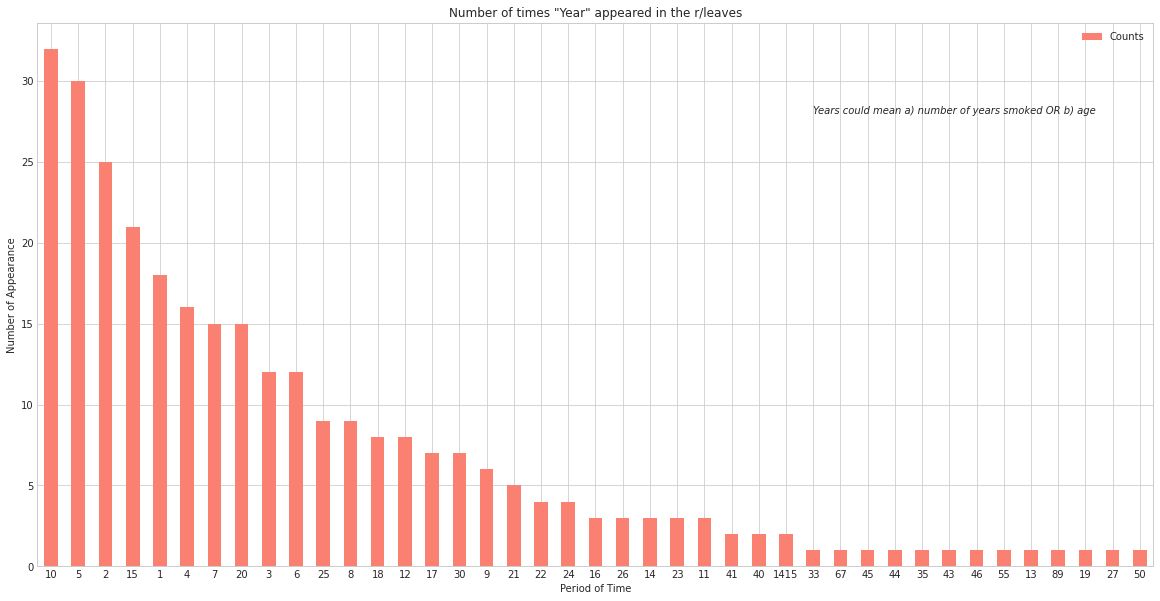

In [8]:
# YEAR
year = processed_docs[processed_docs.str.contains(r'\d+ year|year \d+')]
year = list(year.str.findall(r'\d+ year|year \d+'))
year = [item[0].split(' ') for item in year]
year = [' '.join(reversed(item)) for item in year if re.match(r'\d', item[0])]
year = pd.Series(year)
year = year.value_counts().to_frame('Counts').reset_index(level=0)
year.columns = ['Year', 'Counts']
year['Year'] = year['Year'].str.replace(r'\D', '').astype(int)
year.set_index('Year', inplace=True)

# Visualizing the years
plt.style.use('seaborn-whitegrid')
year.plot(kind='bar', color='salmon', figsize=(20, 10))
plt.xlabel('Period of Time')
plt.ylabel('Number of Appearance')
plt.title('Number of times "Year" appeared in the r/leaves')
plt.text(28, 28, 'Years could mean a) number of years smoked OR b) age', style='italic')
plt.xticks(rotation=0)
plt.show()

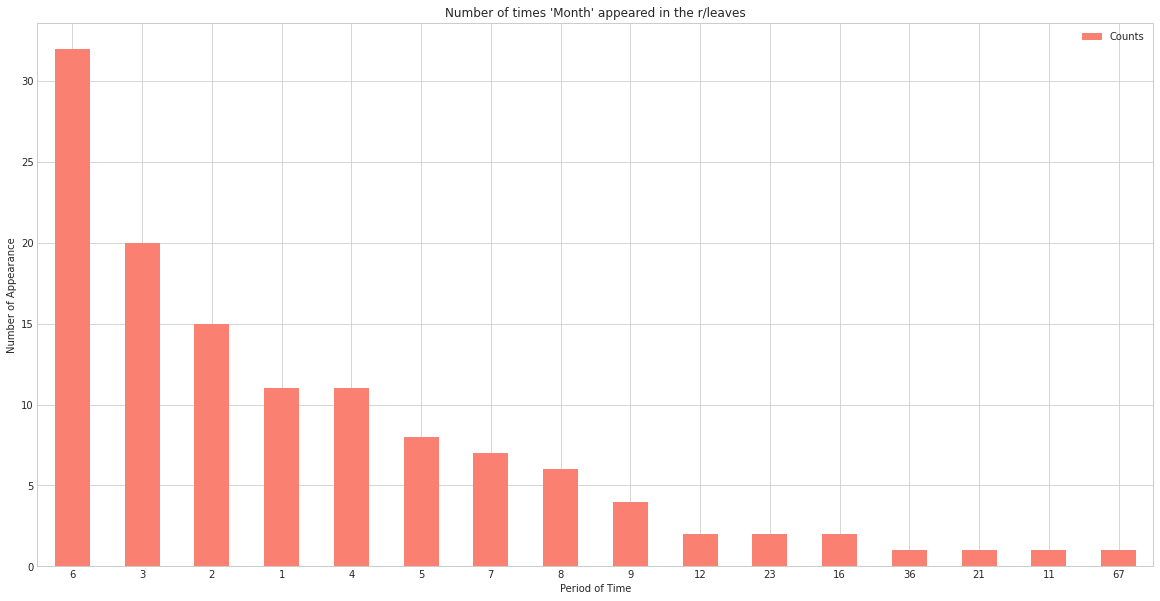

In [9]:
# MONTH
month = processed_docs[processed_docs.str.contains(r'\d+ month|month \d+')]
month = list(month.str.findall(r'\d+ month|month \d+'))
month = [item[0].split(' ') for item in month]
month = [' '.join(reversed(item)) for item in month if re.match(r'\d', item[0])]
month = pd.Series(month)
month = month.value_counts().to_frame('Counts').reset_index(level=0)
month.columns = ['Month', 'Counts']
month['Month'] = month['Month'].str.replace(r'\D', '').astype(int)
month.set_index('Month', inplace=True)

# Visualizing the months
plt.style.use('seaborn-whitegrid')
month.plot(kind="bar", color='salmon', figsize=(20, 10))
plt.xlabel("Period of Time")
plt.ylabel("Number of Appearance")
plt.title("Number of times 'Month' appeared in the r/leaves")
plt.xticks(rotation=0)
plt.show()

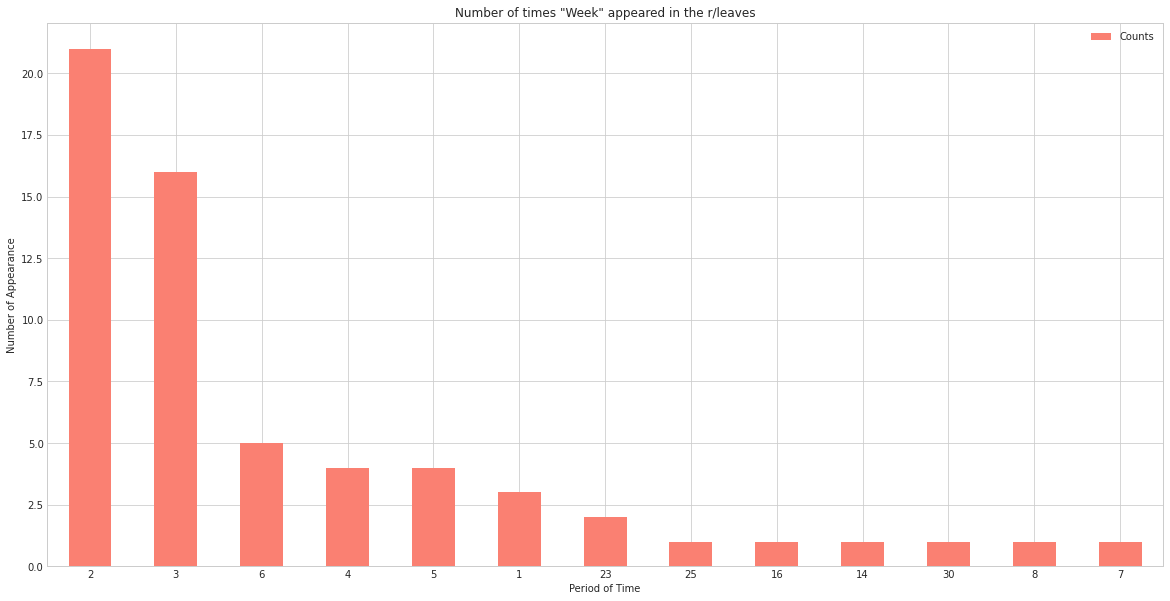

In [10]:
# WEEK
week = processed_docs[processed_docs.str.contains(r'\d+ week|week \d+')]
week = list(week.str.findall(r'\d+ week|week \d+'))
week = [item[0].split(' ') for item in week]
week = [' '.join(reversed(item)) for item in week if re.match(r'\d', item[0])]
week = pd.Series(week)
week = week.value_counts().to_frame('Counts').reset_index(level=0)
week.columns = ['Week', 'Counts']
week['Week'] = week['Week'].str.replace(r'\D', '').astype(int)
week.set_index('Week', inplace=True)

# Visualizing the months
plt.style.use('seaborn-whitegrid')
week.plot(kind='bar', color='salmon', figsize=(20, 10))
plt.xlabel('Period of Time')
plt.ylabel('Number of Appearance')
plt.title('Number of times "Week" appeared in the r/leaves')
plt.xticks(rotation=0)
plt.show()

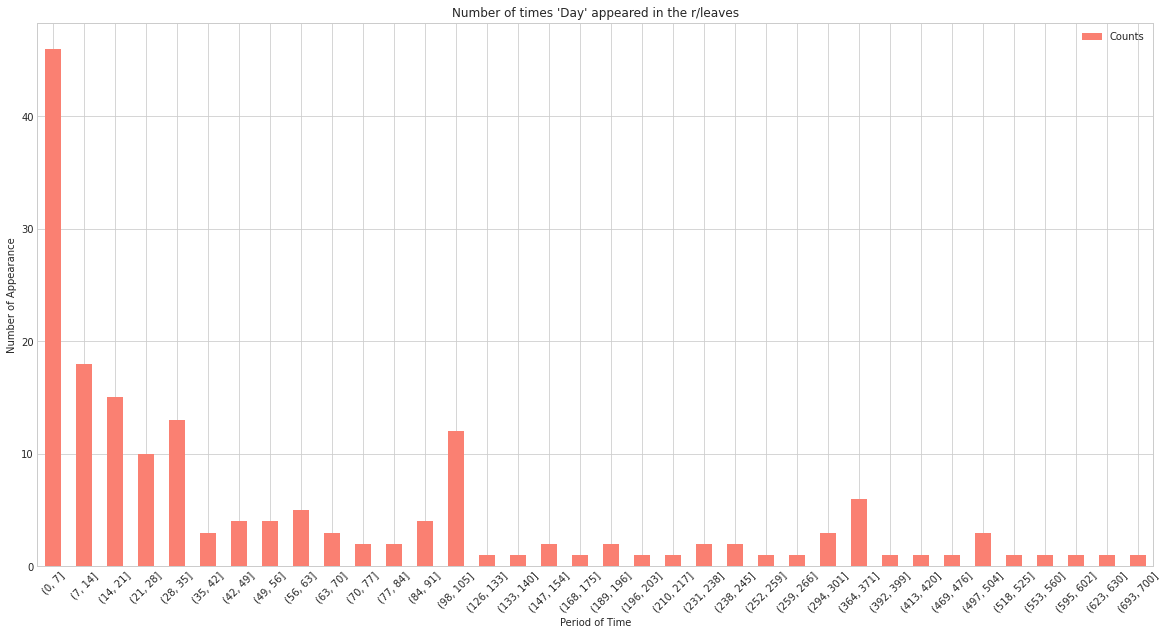

In [11]:
# DAY
day = processed_docs[processed_docs.str.contains(r'\d+ day|day \d+')]
day = list(day.str.findall(r'\d+ day|day \d+'))
day = [item[0].split(" ") for item in day]
day = [' '.join(reversed(item)) for item in day if re.match(r'\d', item[0])]
day = pd.Series(day)
day = day.value_counts().to_frame('Counts').reset_index(level=0)
day.columns = ["Day", "Counts"]
day['Day'] = day['Day'].str.replace(r'\D', '').astype(int)

# Bin the days in to 7 day increment
day_week = day.groupby(pd.cut(day["Day"], np.arange(0, day['Day'].max(), 7))).sum()
day_week = day_week[day_week['Counts'] >= 1].drop(["Day"], axis=1)

# Visualizing the days
plt.style.use('seaborn-whitegrid')
day_week.plot(kind="bar", color='salmon', figsize=(20, 10))
plt.xlabel("Period of Time")
plt.ylabel("Number of Appearance")
plt.xticks(rotation=45)
plt.title("Number of times 'Day' appeared in the r/leaves")
plt.show()

In [12]:
#VISUALIZATION

#from gensim.models import Word2Vec, KeyedVectors
#import warnings
#warnings.filterwarnings('ignore')
#
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.manifold import TSNE
#
#model = KeyedVectors.load('model_cbow.bin')
#
#words_vocab = list(model.wv.vocab)
#print("Size of Vocabulary: ", len(words_vocab))
#print("="*30)
#print("Few Words in Vocabulary", words_vocab[:50])

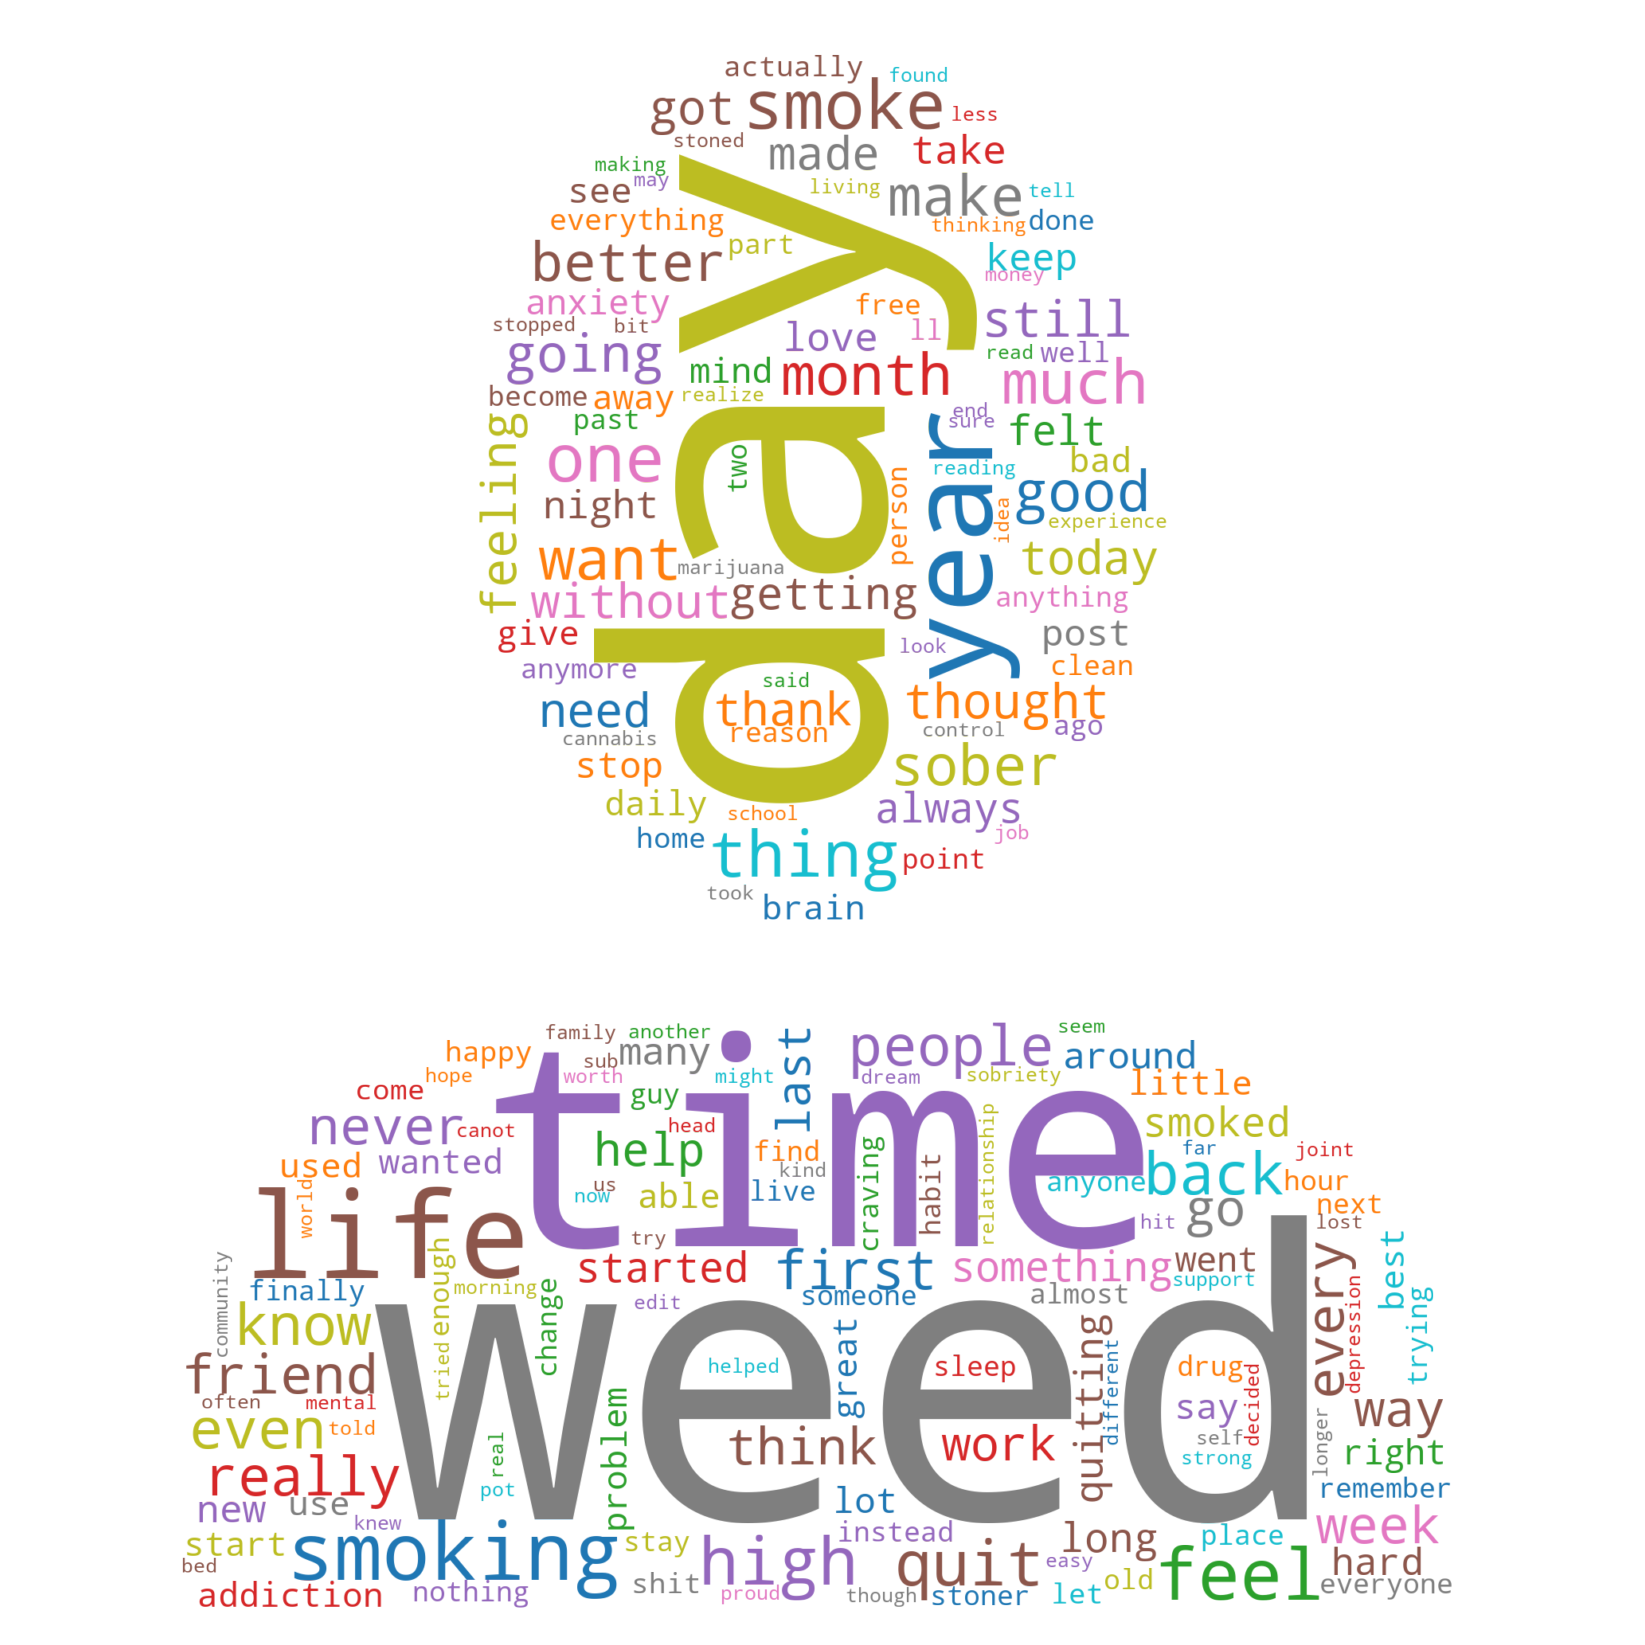

In [13]:
# WordCloud

wordcloud_text = ' '.join(processed_docs.tolist())

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off");

wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color="rgba(255, 255, 255, 0)", mode="RGBA", colormap='tab10', collocations=False).generate(wordcloud_text)
#wordcloud.to_file("wordcloud_leaves.png")
#plot_cloud(wordcloud)

# WordCloud with Mask
mask = np.array(Image.open('user.png'))

wordcloud_user = WordCloud(width=3000, height=2000, random_state=1, background_color="rgba(255, 255, 255, 0)", mode="RGBA", colormap='tab10', collocations=False, mask=mask).generate(wordcloud_text)
#wordcloud_user.to_file("wordcloud_user_leaves.png")
plot_cloud(wordcloud_user)

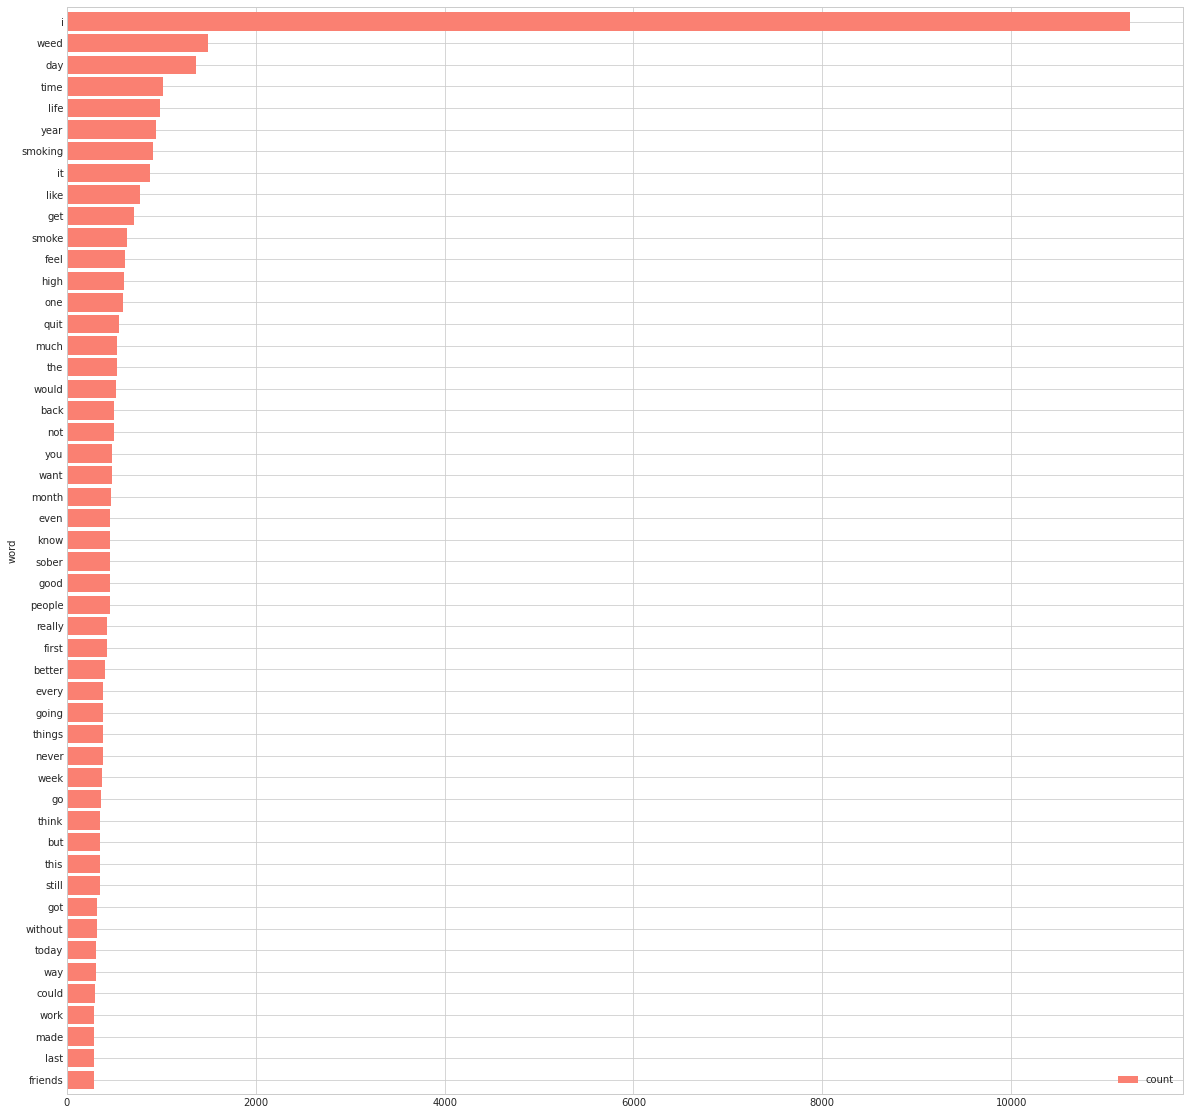

In [14]:
plt.style.use('seaborn-whitegrid')
top_words_barh = pd.DataFrame(top_words, columns=['word', 'count']).set_index('word').sort_values(by='count', ascending=True)
top_words_barh.plot(kind='barh', color='salmon', figsize=(20,20), width=0.85)
plt.show()

In [15]:
print(tabulate(top_words, headers=["Word", "Count"], tablefmt='grid'))

+---------+---------+
| Word    |   Count |
+=========+=========+
| i       |   11257 |
+---------+---------+
| weed    |    1494 |
+---------+---------+
| day     |    1368 |
+---------+---------+
| time    |    1014 |
+---------+---------+
| life    |     983 |
+---------+---------+
| year    |     947 |
+---------+---------+
| smoking |     907 |
+---------+---------+
| it      |     877 |
+---------+---------+
| like    |     775 |
+---------+---------+
| get     |     709 |
+---------+---------+
| smoke   |     639 |
+---------+---------+
| feel    |     618 |
+---------+---------+
| high    |     603 |
+---------+---------+
| one     |     589 |
+---------+---------+
| quit    |     556 |
+---------+---------+
| much    |     534 |
+---------+---------+
| the     |     531 |
+---------+---------+
| would   |     515 |
+---------+---------+
| back    |     497 |
+---------+---------+
| not     |     495 |
+---------+---------+
| you     |     474 |
+---------+---------+
| want    

In [16]:
import spacy
import textacy.ke
from textacy import *

In [17]:
en = textacy.load_spacy_lang('en_core_web_sm')

In [18]:
text = ' '.join(processed_docs)

#with open('rleaves.txt', 'w') as output:
#    output.write(text)

In [19]:
doc = textacy.make_spacy_doc(text, lang=en)

In [20]:
textacy.ke.textrank(doc, topn=10)

[('weed life easy life easy life shit life', 0.026535333194982233),
 ('sober life life free chase goals aspirations time day',
  0.021235952006705198),
 ('choice smoke weed smoke weed', 0.020045589746834853),
 ('time cut weed good feel difference mental health productivity relationship',
  0.01981657745603561),
 ('weed life weed warm hug sad thing', 0.01881047491174946),
 ('day time life beautiful day', 0.018791549432486405),
 ('week reclaim time reclaim life year day', 0.018373393415164065),
 ('time time day day yuck', 0.01831245317551382),
 ('rise acceptance weed general public overall good thing opinion lead arrogance canot detrimental smoke',
  0.01754095280815264),
 ('day weed free thought realizations day', 0.01733805654977462)]

In [21]:
print('Textrank output: ', [kps for kps, weights in textacy.ke.textrank(doc, normalize='lemma', topn=10)])

Textrank output:  ['weed life easy life easy life shit life', 'sober life life free chase goals aspirations time day', 'choice smoke weed smoke weed', 'time cut weed good feel difference mental health productivity relationship', 'weed life weed warm hug sad thing', 'day time life beautiful day', 'week reclaim time reclaim life year day', 'time time day day yuck', 'rise acceptance weed general public overall good thing opinion lead arrogance canot detrimental smoke', 'day weed free thought realizations day']


In [51]:
#print('SGRank output: ', [kps for kps, weights in textacy.ke.sgrank(doc, topn=10)])

SGRank output:  ['year', 'time', 'life', 'weed', 'day', 'people', 'thing', 'good', 'high', 'month']


In [52]:
#terms = set([term for term, weight in textacy.ke.sgrank(doc)])
#print(textacy.ke.utils.aggregate_term_variants(terms))

[{'rise acceptance weed general public overall good thing opinion lead arrogance canot detrimental smoke'}, {'time cut weed good feel difference mental health productivity relationship'}, {'sober life life free chase goals aspirations time day'}, {'weed life easy life easy life shit life'}, {'week reclaim time reclaim life year day'}, {'day weed free thought realizations day'}, {'weed life weed warm hug sad thing'}, {'choice smoke weed smoke weed'}, {'day time life beautiful day'}, {'time time day day yuck'}]
